## III. Implementacion

**12. Usando el Scikit-learn de Python, implemente (comente su codigo) una SVM que clasifique un conjunto de datos.**


Para este ejercicio usare el dataset de "datos de iris" para predecir la categoria la categoria a la que pertenece una planta segun 4 caracterisiticas: ancho de sepalo, largo de sepalo, ancho de petalo y largo de petalo.
El dataset puede descargarse del siguiente enlace:
https://archive.ics.uci.edu/ml/datasets/iris

Para entrenar un modelo SVM con Scikit-learn seguire los siguientes pasos:
- Importar el conjunto de datos
- Preprocesar los datos
- Dividir el dataset para realizar validacion cruzada
- Entrenar el modelo
- Hacer predicciones

### 1. Importar el dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Asignamos nombres a las columnas
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Leer el dataset en un datframe de panda
irisdata = pd.read_csv(url, names=colnames)  

In [2]:
# a continuacion visualizamos los primeros 3 registros 
irisdata.head(3)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
#numero de ejemplos en el dataset
print('numero de ejemplos de entrenamiento: ',irisdata.shape[0])
#numero de caracteristicas en el dataset
print('numero de caracterisiticas: ',irisdata.shape[1]-1)
#numero de categorias en el dataset
print("categorias: ", irisdata.Class.unique())

numero de ejemplos de entrenamiento:  150
numero de caracterisiticas:  4
categorias:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### 2. Preprocesamiento

In [4]:
#Obtener del dataset los ejemplos y etiquetas como series separadas
X = irisdata.drop('Class', axis=1)  
y = irisdata['Class']

### 3. Division del dataset

In [5]:
# dividiremos el dataset usando el 80% de datos para entrenamiento y 
# el restante 20% para las pruebas
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

### 4. Entrenamiento

In [6]:
#Para este ejercicio empleare un kernel polinomial
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=8)  
#entrenamiento
svclassifier.fit(X_train, y_train) 

/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### 5.Predicciones y evaluacion 

In [7]:
#Predicciones
y_pred = svclassifier.predict(X_test)  
#Evaluacion
from sklearn.metrics import classification_report
#Usamos metricas para evaluar las predicciones
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


**13. Experimente y muestre resultados usando diferentes valores para los parametros de los kernels: lineal,polinomial, gaussiano, y el parametro C. Los resultados deben ser mostrados en el documento pdf.**

Para este ejercicio se usaran solo dos caracteristicas del dataset para poder visualizar las clasificaciones.

### Pruebas de kernels

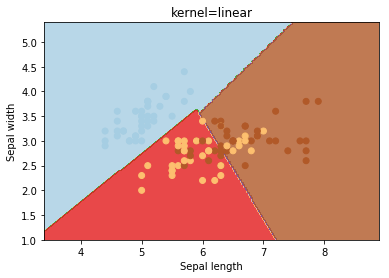

Accuracy: 0.8666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


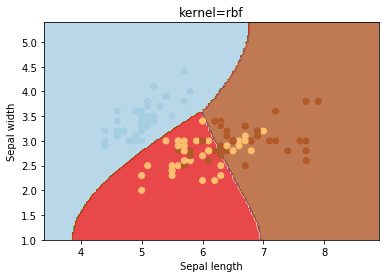

Accuracy: 0.8666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


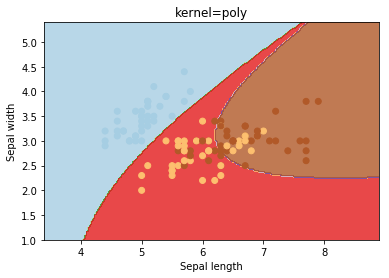

Accuracy: 0.8666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


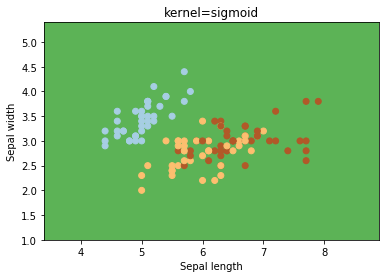

Accuracy: 0.26666666666666666


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import metrics
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, :2] #Usar solo 2 caracterisiticas
y = iris.target

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

def plotSVC(title):
    X=X_train
    y=y_train
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()
    

kernels = ['linear', 'rbf', 'poly','sigmoid']
for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X, y)
    plotSVC('kernel=' + str(kernel))
    y_pred = svc.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Variacion de parametros

### Parametro Gamma
Este es un parámetro para hiperplanos no lineales. Cuanto mayor sea el valor gamma, el ajuste se realizara mas precisamente. En las siguientes graficas vemos que a medida que este parametro incrementa el modelo es sobreentrenado (Overfitting).

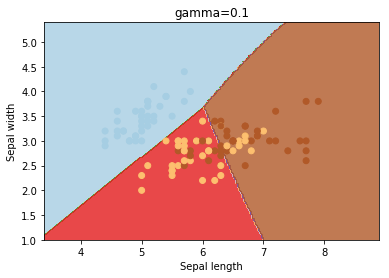

Accuracy: 0.8666666666666667


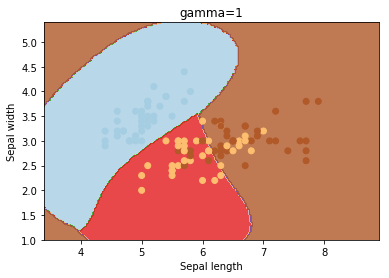

Accuracy: 0.8333333333333334


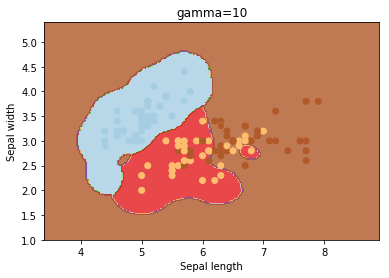

Accuracy: 0.8333333333333334


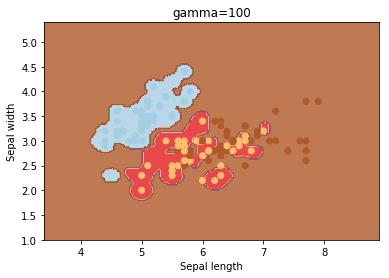

Accuracy: 0.9333333333333333


In [14]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
    plotSVC('gamma=' + str(gamma))
    y_pred = svc.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

### Parametro C
Este parámetro penaliza el término de error, es decir controla el equilibrio entre el límite de decisión suave y la clasificación correcta de los puntos de entrenamiento. En las siguientes graficas vemos que a medida que este parametro incrementa el modelo es sobreentrenado (Overfitting).

/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


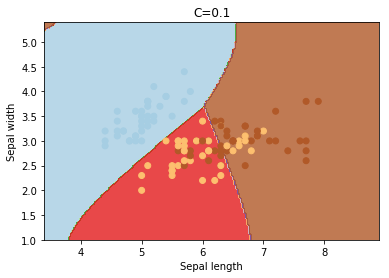

Accuracy: 0.8666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


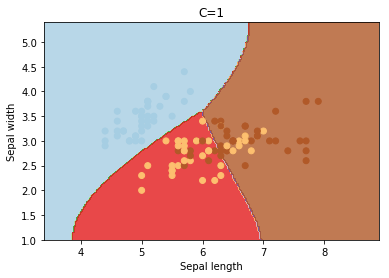

Accuracy: 0.8666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


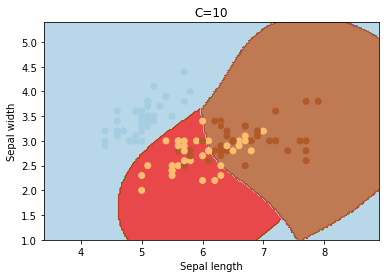

Accuracy: 0.8333333333333334


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


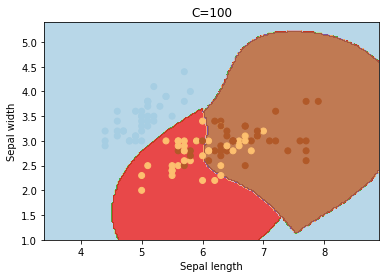

Accuracy: 0.8


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


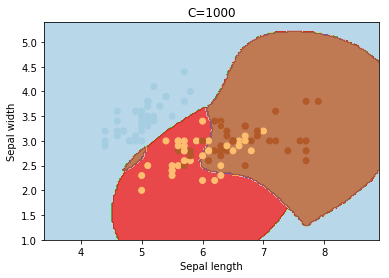

Accuracy: 0.8


In [15]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
    svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
    plotSVC('C=' + str(c))
    y_pred = svc.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

### Parametro degree
Este parámetro es para un svm basado en kernel polinomial, en este caso "degree" es el orden del polinomio del kernel. Usar degree = 1 es lo mismo que usar un kernel "lineal". Además, aumentar este parametro conduce a mayores tiempos de entrenamiento.

/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


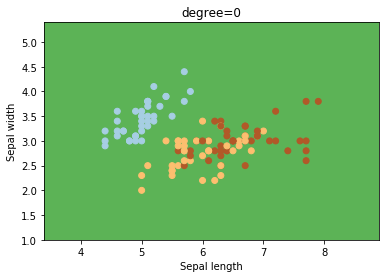

/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.26666666666666666


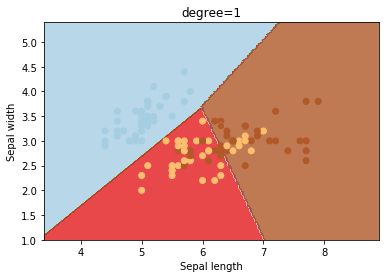

Accuracy: 0.8666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


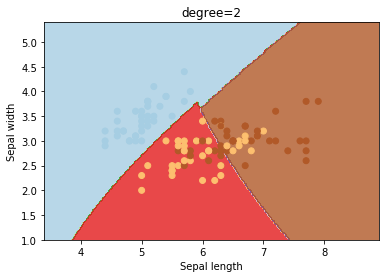

Accuracy: 0.8666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


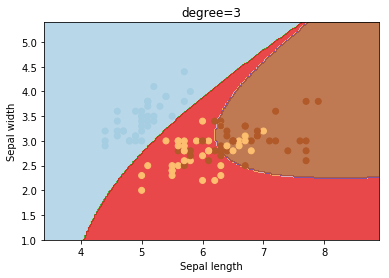

Accuracy: 0.8666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


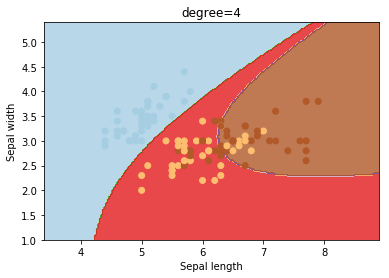

Accuracy: 0.8666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


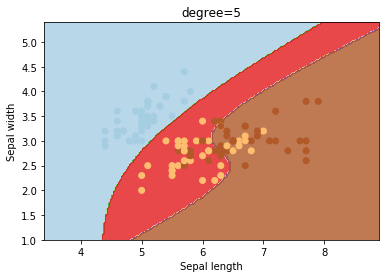

Accuracy: 0.8666666666666667


/home/david/entorno1/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


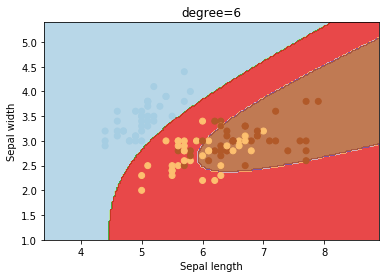

Accuracy: 0.7666666666666667


In [16]:
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree).fit(X, y)
    plotSVC('degree=' + str(degree))
    y_pred = svc.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

### Analisis
Si observamos la precision producidos por los diferentes tipos de kernels, podemos ver que la peor precision la obtiene el kernel sigmoideo, esto es debido a la dimension de las categorias, que en este dataset se tienen 3 categorias pero la kernel sigmoideo devuelve dos valores. De todos los kernels usados, el kernel polinomico y lineal tienen las mas altas precisiones (Polinomico=100%, lineal=96.6%).
Al momento de variar los parametros del modelo, se pudo observar que a medida que incrementan estos producen un sobreentrenamiento del modelo. Tambien se noto que la cota maxima de la precision de los modelos es 87%.